# Homework 2 Regression Refresher

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

***
## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$f(x) = x^3 - 6x^2 +11x - 6$

### 1.1 First task
- Plot f(V) over a range where you can observe the real roots.

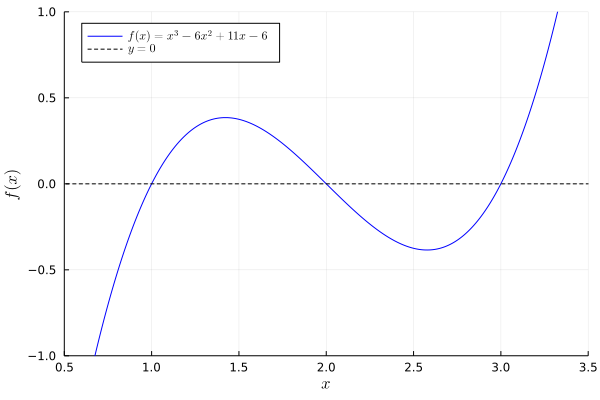

In [7]:
using Plots
using LaTeXStrings

X = range(-5, 5, 1000)
f(x) = x^3 - 6*x^2 + 11*x - 6

pol3 = plot(X, f.(X), xlabel=L"x", ylabel=L"f(x)", ls=:solid, c=:blue,
            label=L"f(x) = x^3 - 6x^2 +11x - 6", xlims=(0.5, 3.5), ylims=(-1, 1))
plot!(pol3, [findmin(X)[1], findmax(X)[1]], [0, 0], ls=:dash, c=:black, label=L"y=0", legend=:topleft)

### 1.2 Second task
- In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 

In [20]:
function linear_fit(y_real, m_init, rate)

    function SSE(x)
        f(x) = x^3 - 6*x^2 + 11*x - 6
        y_aprox = f(x)
        err = y_aprox - y_real
        return sum(err.^2)
    end

    function derivative(m, Δm)  
        ΔSSE = (SSE(m + Δm) - SSE(m))/Δm
        return ΔSSE
    end

    i = 0
    m_i = m_init
    tol = 1E-5
    ΔSSE_i = 1

    while (i < 500) & (abs(ΔSSE_i) >= tol)
        ΔSSE_i = derivative(m_i, 1E-2)
        m_new = m_i - rate * ΔSSE_i
        m_i = m_new
        i += 1
    end
    return m_i, SSE(m_i)
end

y_real = 0
rate = 0.005

m_init_0 = 0.5
m_init_1 = 1.5
m_init_2 = 3.5
p₀ = round(linear_fit(y_real, m_init_0, rate)[1], digits=1)
p₁ = round(linear_fit(y_real, m_init_1, rate)[1], digits=1)
p₂ = round(linear_fit(y_real, m_init_2, rate)[1], digits=1)

printstyled("The Roots of the polynomial found are:\n"; color=:yellow)
printstyled("root_0 = $(p₀) for an initial guess of $(m_init_0)\n"; color=:blue)
printstyled("root_1 = $(p₁) for an initial guess of $(m_init_1)\n"; color=:blue)
printstyled("root_2 = $(p₂) for an initial guess of $(m_init_2)\n"; color=:blue)    

The Roots of the polynomial found are:
root_0 = 1.0 for an initial guess of 0.5
root_1 = 2.0 for an initial guess of 1.5
root_2 = 3.0 for an initial guess of 3.5


### 1.3 Third task
- Find all the "roots" using a professional function.

In [6]:
using Roots
r₀, r₁, r₂ = [floor(r) for r in find_zeros(f, 0.5, 3.5)]
printstyled("The Roots of the polynomial found are:\n"; color=:yellow)
printstyled("r_0 = $(r₀) \nr_1 = $(r₁) \nr_2 = $(r₂) \n"; color=:blue)

The Roots of the polynomial found are:
r_0 = 1.0 
r_1 = 2.0 
r_2 = 3.0 
